In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import math

In [2]:
# Importing Players.csv and Seasons_Stats.csv
Players_file = pd.read_csv('Players.csv',sep=',',header=0)
Players = Players_file.values

Stats_file = pd.read_csv('Seasons_Stats.csv',sep=',',header=0)
Stats = Stats_file.values

In [3]:
# Importing MVP_Winners.csv and reformatting to match earlier files
Winners_file = pd.read_csv('MVP_Winners.csv',sep=',',header=1) #dont have data for 2017-18
Winners = Winners_file.values

for i in range(len(Winners[:,0])):
    Winners[i,0] = int(Winners[i,0][:2]+Winners[i,0][5:7])
    Winners[i,1] = Winners[i,1].split('\\')[0]
Winners[17,0] = 2000

In [4]:
# Make new arrays for MVPs, index of MVPs, and nonMVPs
MVPs = np.ndarray( (len(Winners[:,0]) , len(Stats[0,:])) , dtype='object')
MVP_index = []
nonMVPs = np.ndarray( (len(Stats[:,0])-len(Winners[:,0]) , len(Stats[0,:])) , dtype='object')
for i in range(len(Stats[:,1])):
    for j in range(len(Winners[:,0])):
        if Winners[j,0] == Stats[i,1]:
            if Winners[j,1] == Stats[i,2].strip('*'):
                MVP_index.append(i)
                MVPs[j,:] = Stats[i,:]

In [5]:
# Importing Team_Wins.csv
with open('Team_Wins.csv') as file:
    dr = csv.DictReader(file)
    win_data = [[0,i['ATL'],i['BOS'],i['BRK'],i['CHI'],i['CHO'],i['CLE'],
                 i['DAL'],i['DEN'],i['DET'],i['GSW'],i['HOU'],i['IND'],
                 i['LAC'],i['LAL'],i['MEM'],i['MIA'],i['MIL'],i['MIN'],
                 i['NOP'],i['NYK'],i['OKC'],i['ORL'],i['PHI'],i['PHO'],
                 i['POR'],i['SAC'],i['SAS'],i['TOR'],i['UTA'],i['WAS']] for i in dr]
for i in range(len(win_data)):
    win_data[i][0] = 2017-i

In [6]:
# Stats to use for learning:
# Age, Games(/SeasonLength), Games Started(/Games), Minutes Played, TS%, 3PAr,
# FTr, ORB%, DRB%, TRB%, AST%, STL%, BLK%, TOV%, Field Goals, FGA, FG%, 3P, 3PA
# 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF,
# PTS, Team Wins, index

# Going to append id to end of each player data

# https://datascience.stackexchange.com/questions/13178/how-to-normalize-data-for-neural-network-and-decision-forest

# This puts all the raw data into a list of tuples (team wins added later)
with open('Seasons_Stats.csv') as file:
    dr = csv.DictReader(file)
    raw_data = [(i['Year'],i['Tm'],i['Age'],i['G'],i['GS'],i['MP'],i['TS%'],i['3PAr'],
                 i['FTr'],i['ORB%'],i['DRB%'],i['TRB%'],i['AST%'],i['STL%'],i['BLK%'],
                 i['TOV%'],i['FG'],i['FGA'],i['FG%'],i['3P'],i['3PA'],i['3P%'],i['2P'],
                 i['2PA'],i['2P%'],i['eFG%'],i['FT'],i['FTA'],i['FT%'],i['ORB'],
                 i['DRB'],i['TRB'],i['AST'],i['STL'],i['BLK'],i['TOV'],i['PF'],i['PTS'],0,i['']) for i in dr]
    
# Loops to fill data into numpy array, and add team wins
for i in range(len(raw_data)):
    if raw_data[i][0] != '' and int(raw_data[i][0]) == 1974:
        start = i
        break

data = np.ndarray((len(raw_data)-start,len(raw_data[0])-2))
Wins_file = pd.read_csv('Team_Wins.csv',sep=',',header=-1)
headers = Wins_file.values[0][3:]

for i in range(len(data)):
    # Teams with name changes
    raw_data[start+i] = list(raw_data[start+i])
    if raw_data[start+i][1] == 'KCO' or raw_data[start+i][1] == 'KCK':
        raw_data[start+i][1] = 'SAC'
    if raw_data[start+i][1] == 'SEA':
        raw_data[start+i][1] = 'OKC'
    if raw_data[start+i][1] == 'BUF' or raw_data[start+i][1] == 'SDC':
        raw_data[start+i][1] = 'LAC'
    if raw_data[start+i][1] == 'CAP' or raw_data[start+i][1] == 'WSB':
        raw_data[start+i][1] = 'WAS'
    if raw_data[start+i][1] == 'NOJ':
        raw_data[start+i][1] = 'UTA'
    if raw_data[start+i][1] == 'NYN' or raw_data[start+i][1] == 'NJN':
        raw_data[start+i][1] = 'BRK'
    if raw_data[start+i][1] == 'CHH' or raw_data[start+i][1] == 'CHA':
        raw_data[start+i][1] = 'CHO'
    if raw_data[start+i][1] == 'VAN':
        raw_data[start+i][1] = 'MEM'
    if raw_data[start+i][1] == 'NOH' or raw_data[start+i][1] == 'NOK':
        raw_data[start+i][1] = 'NOP'
    
    # Just copying over data
    for j in range(2,len(data[0])+2):
        if raw_data[start+i][j] == '':
            data[i][j-2] = 0
        else:
            data[i][j-2] = float(raw_data[start+i][j])
            if (j-2==1 or j-2==2 or j-2==3 or j-2==14 or j-2==15 or
                j-2==17 or j-2==18 or j-2==20 or j-2==21 or j-2==24 or
                j-2==25 or j-2==27 or j-2==28 or j-2==29 or j-2==30 or
                j-2==31 or j-2==32 or j-2==33 or j-2==34 or j-2==35):
                if raw_data[start+i][0] == '1999':
                    data[i][j-2] = data[i][j-2] / 50.
                elif raw_data[start+i][0] == '2012':
                    data[i][j-2] = data[i][j-2] / 66.
                else:
                    data[i][j-2] = data[i][j-2] / 82.
    
    # Adding team wins (set traded players to 0 wins)
    for k in range(len(win_data)):
        if raw_data[start+i][0] != '' and win_data[k][0] == int(raw_data[start+i][0]):
            team = raw_data[start+i][1]
            try:
                team_index = np.where(headers==team)[0][0]
                wins = 0
                if win_data[k][team_index+1] != '':
                    wins = int(win_data[k][team_index+1])
                data[i][-2] = wins
            except:
                data[i][-2] = 0
    if raw_data[start+i][0] == '1999':
        data[i][-2] = data[i][-2] / 50.
        if data[i][-2] == 0:
            data[i][-2] = 0.5
    elif raw_data[start+i][0] == '2012':
        data[i][-2] = data[i][-2] / 66.
        if data[i][-2] == 0:
            data[i][-2] = 0.5
    else:
        data[i][-2] = data[i][-2] / 82.
        if data[i][-2] == 0:
            data[i][-2] = 0.5

In [7]:
# Normalizing data and filtering for minimum minutes (oof this is ugly)
def normalize(data):
    minTime = 10.0
    low_minutes = []
    for i in range(len(data)):
        if data[i][3] < minTime:
            low_minutes.append(i)
    ndata = np.ndarray( ( len(data)-len(low_minutes), len(data[0])))

    j=0
    for i in range(len(data)):
        if i not in low_minutes:
            ndata[j] = data[i]
            j = j+1

    for i in range(len(ndata[0])-1):
        up = max(ndata[:,i])
        lo = min(ndata[:,i])
        ndata[:,i] = (ndata[:,i]-lo)/(up-lo) - 0.5
    return ndata
ndata = normalize(data)

In [8]:
#separting MVPs and adding labels
nind = []
labels = np.zeros(len(ndata))
for i in MVP_index:
    if i > 3625:
        nind.append(i)
ndata_MVP = np.ndarray((len(nind),len(ndata[0])))
for i in range(len(nind)):
    for j in range(len(ndata)):
        if nind[i] == ndata[j][-1]:
            ndata_MVP[i] = ndata[j]
            labels[j] = 1

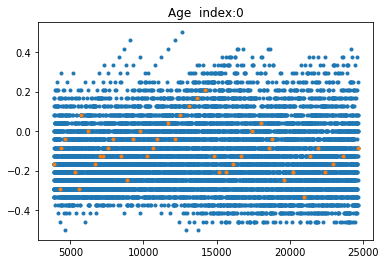

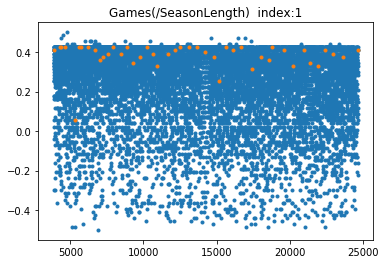

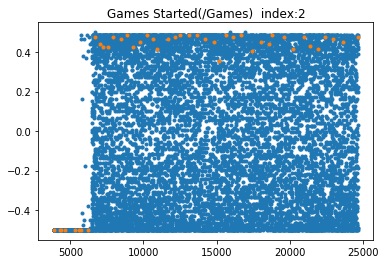

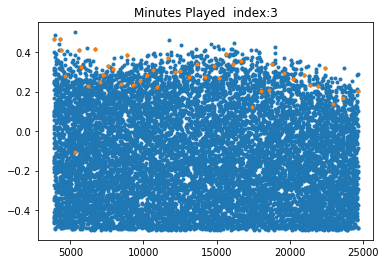

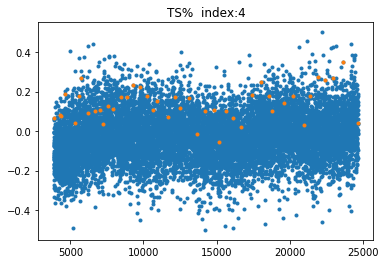

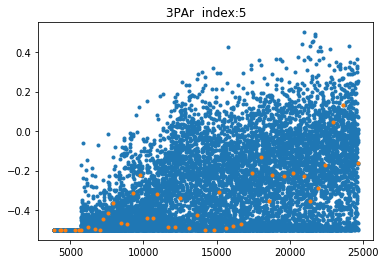

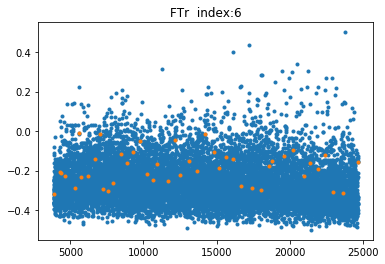

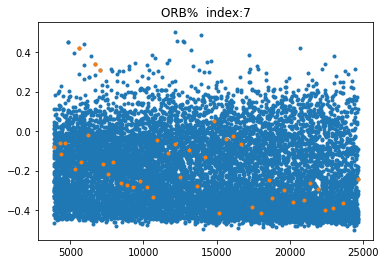

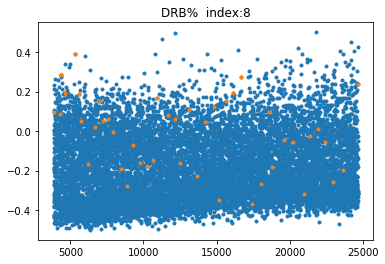

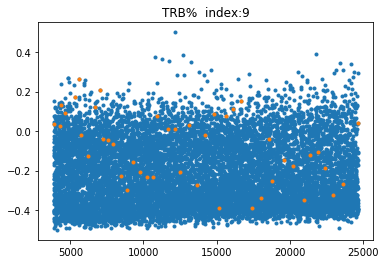

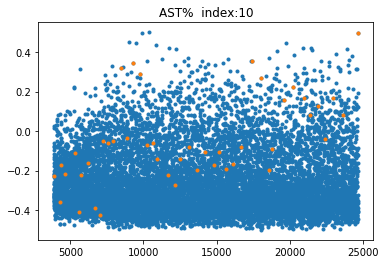

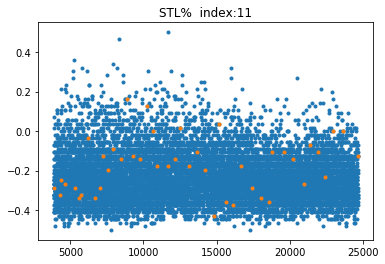

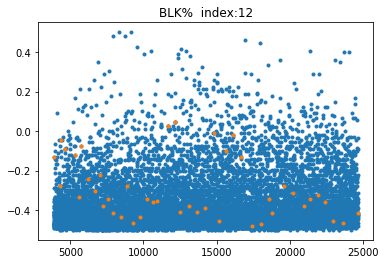

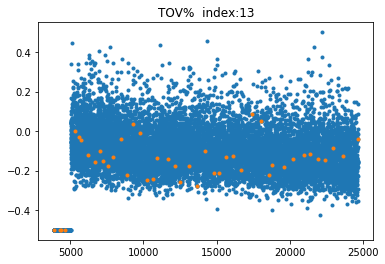

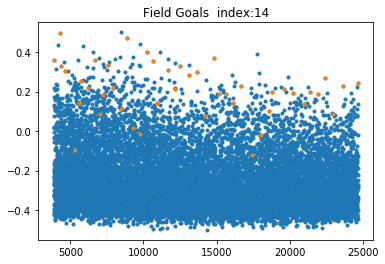

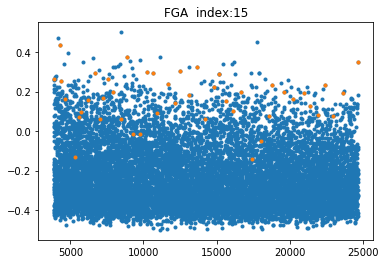

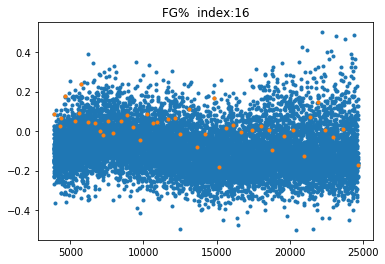

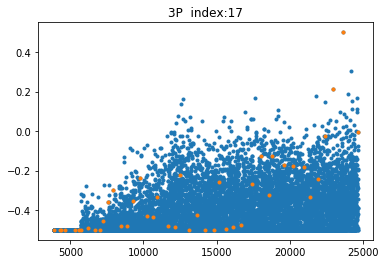

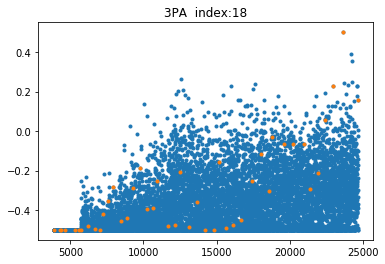

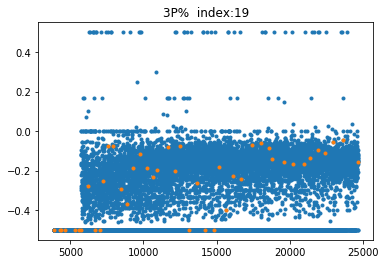

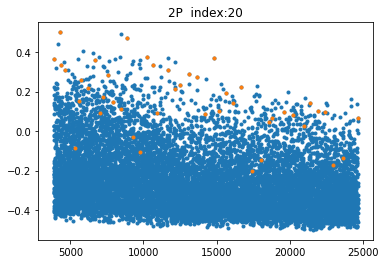

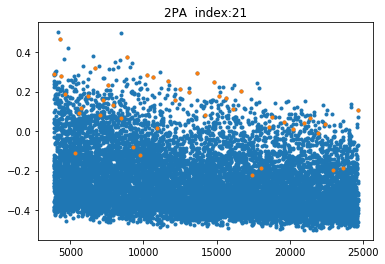

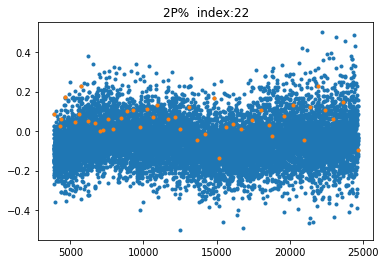

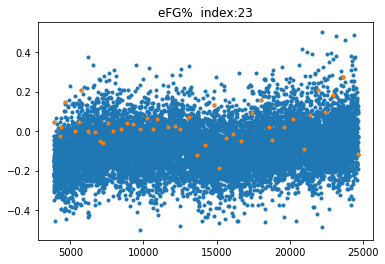

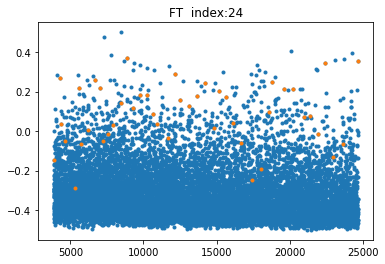

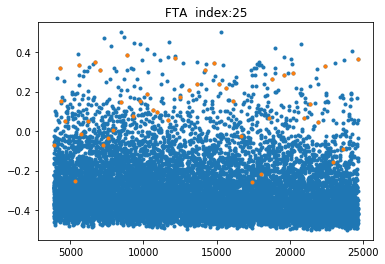

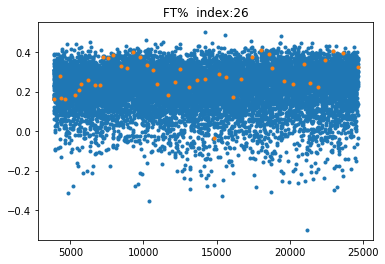

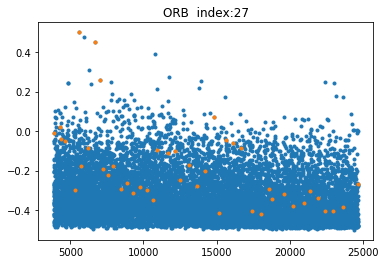

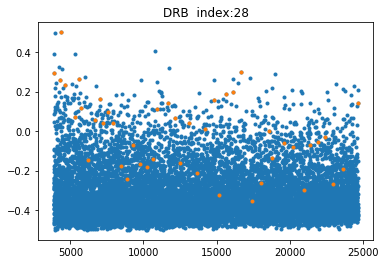

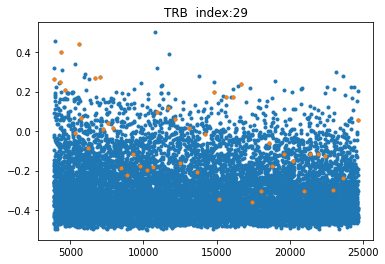

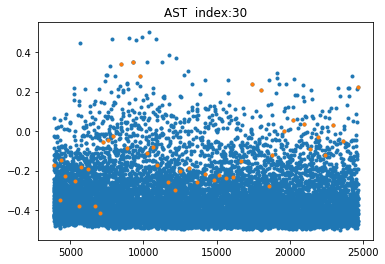

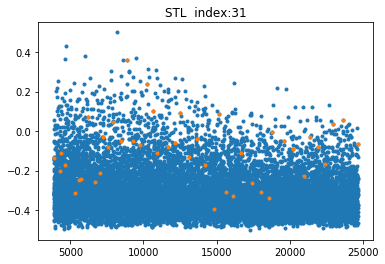

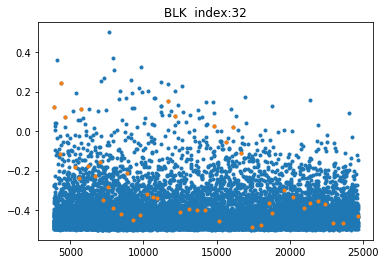

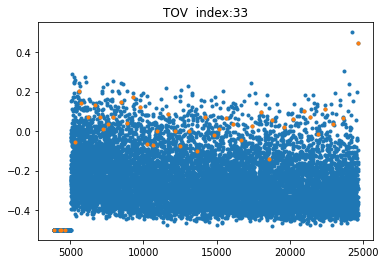

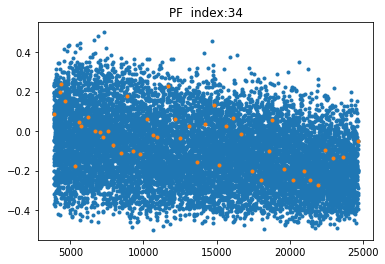

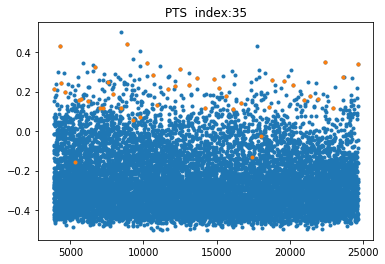

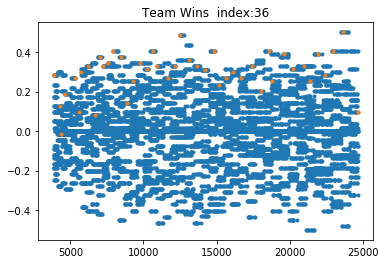

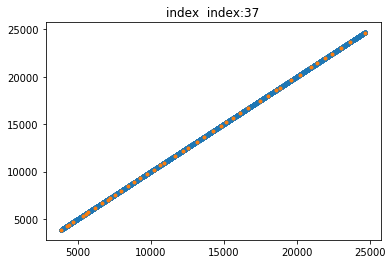

In [9]:
# Plot each column to check for outliers
Labels = [ 'Age', 'Games(/SeasonLength)', 'Games Started(/Games)', 'Minutes Played', 'TS%', '3PAr',
 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'Field Goals', 'FGA', 'FG%', '3P', '3PA',
 '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
 'PTS', 'Team Wins', 'index' ]

def feature_plots(data1, data2, Labels):
    for i in range(len(ndata[0])):
        plt.plot(data1[:,-1],data1[:,i],'.')
        plt.plot(data2[:,-1],data2[:,i],'.')
        plt.title(Labels[i]+'  index:'+str(i))
        plt.show()
feature_plots(ndata,ndata_MVP,Labels)

In [10]:
# Building MVP distance matrix
def dist(a, b):
    s = 0
    for i in range(len(a)):
        s = s + (a[i] - b[i])**2
    return np.sqrt(s)

l = len(ndata_MVP)
dist_MVP = np.ndarray((l,l))
for i in range(l):
    for j in range(l):
        dist_MVP[i][j] = dist(ndata_MVP[i][:-1], ndata_MVP[j][:-1])

In [11]:
# Finding nearest neighbors (ct is how many neighbors)
ct = 5
closest = np.zeros((l,ct)) + 10
close_dist = np.zeros((l,ct)) + 10
for i in range(l):
    for j in range(l):
        if i != j:
            if dist_MVP[i][j] < np.max(close_dist[i]):
                closest[i][np.argmax(close_dist[i])] = j
                close_dist[i][np.argmax(close_dist[i])] = dist_MVP[i][j]

In [12]:
# Code for generating printable list of closest MVPs
for i in range(l):
    mID = int(ndata_MVP[i][-1])
    year = raw_data[mID][0]
    name = Stats[mID][2]
    close = []
    for j in range(ct):
        close.append((Stats[int(ndata_MVP[int(closest[i][j])][-1])][2],
                      int(Stats[int(ndata_MVP[int(closest[i][j])][-1])][1])))
    #print(close)

In [13]:
# Generate N synthetic MVPs
N = len(ndata)-len(ndata_MVP)
def MVP_gen(N):
    sdata_MVP = np.ndarray((N,len(ndata_MVP[0])))
    c1 = np.random.randint(0,l,N)
    c2 = np.random.randint(0,ct,N)
    for i in range(N):
        data1 = ndata_MVP[c1[i]]
        data2 = ndata_MVP[int(closest[c1[i],c2[i]])]
        sdata_MVP[i][:] = np.random.rand()*(data1-data2) + data2
    return sdata_MVP
sdata_MVP = MVP_gen(N)
print(N)

11757


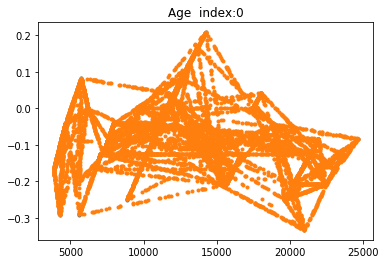

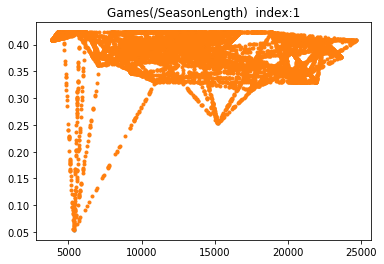

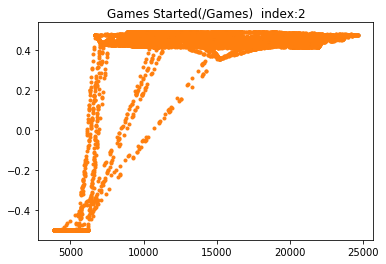

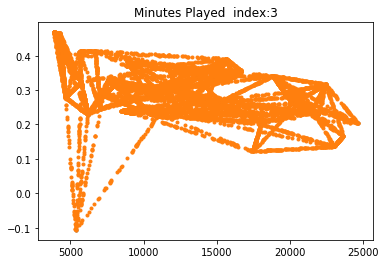

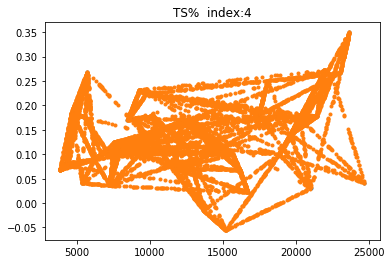

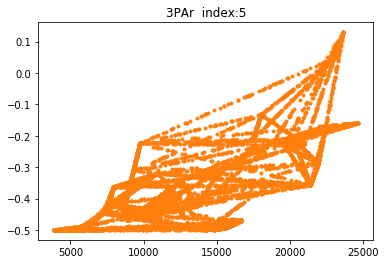

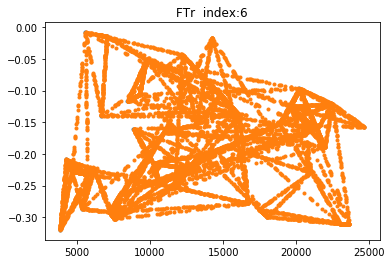

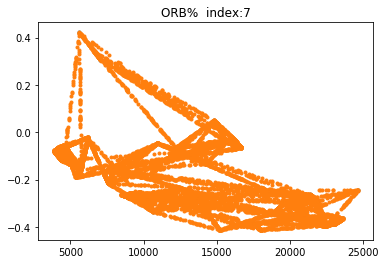

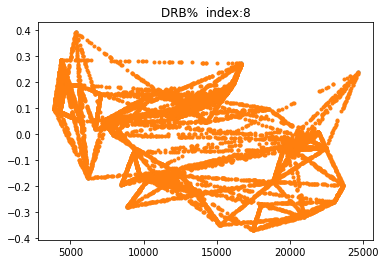

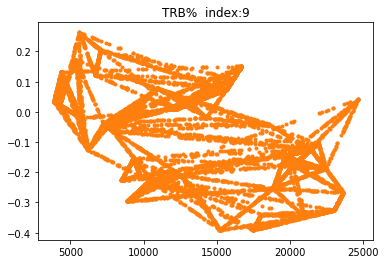

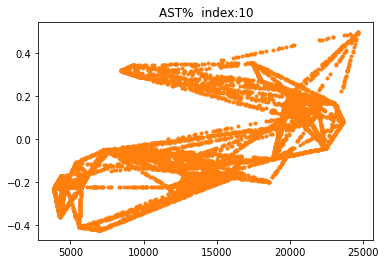

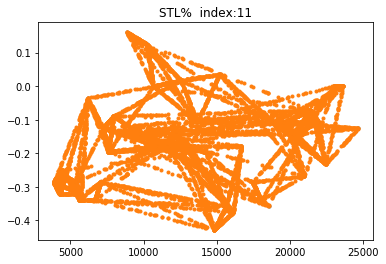

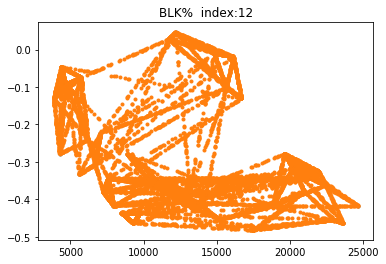

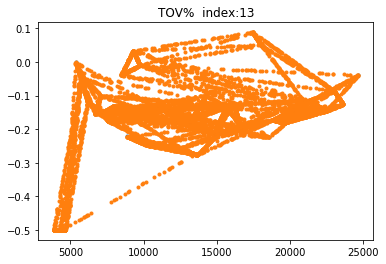

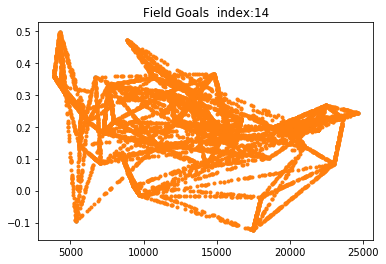

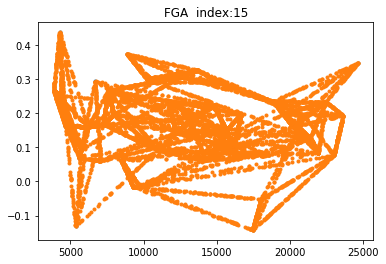

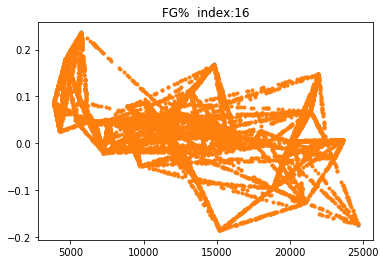

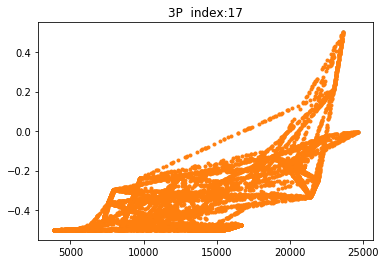

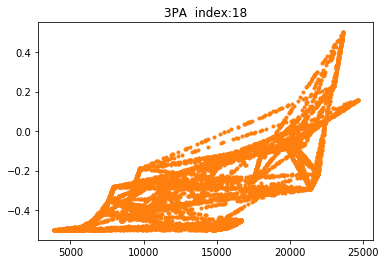

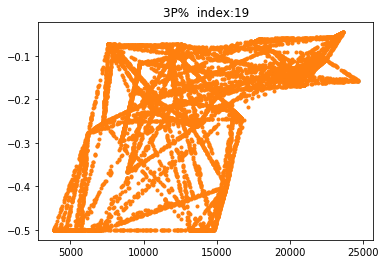

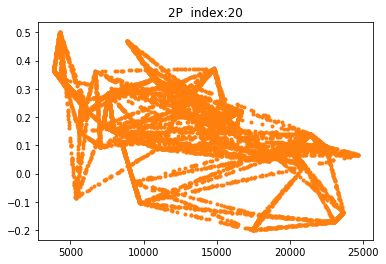

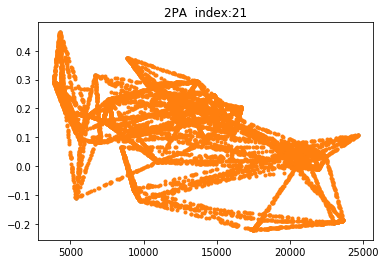

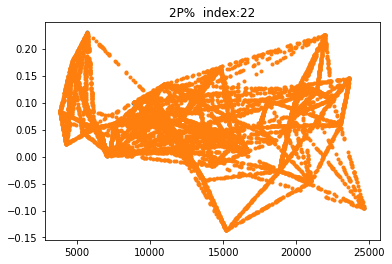

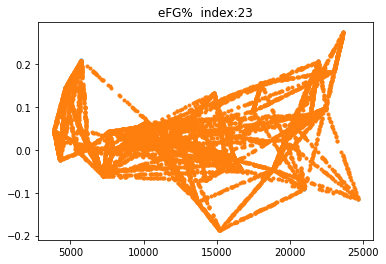

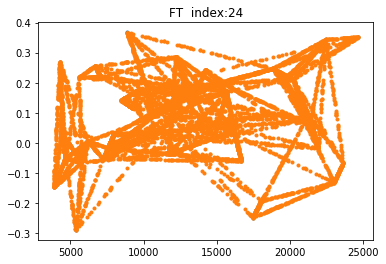

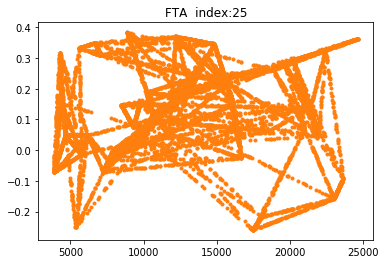

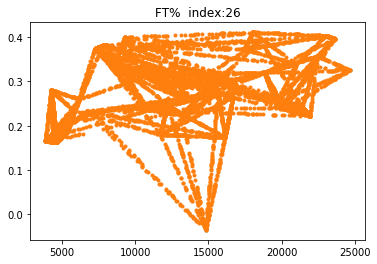

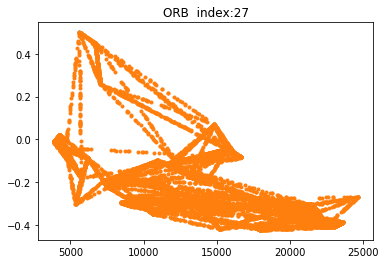

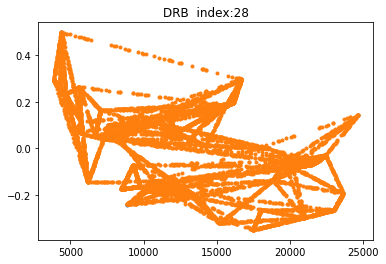

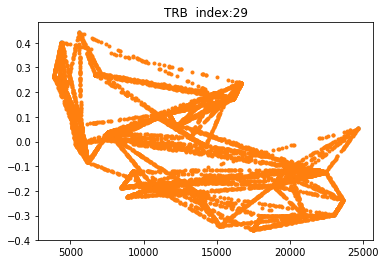

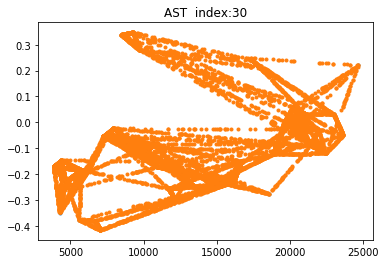

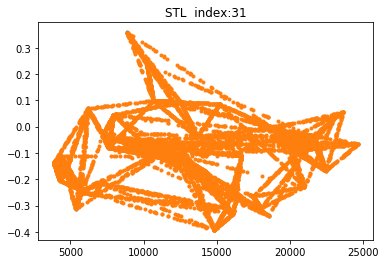

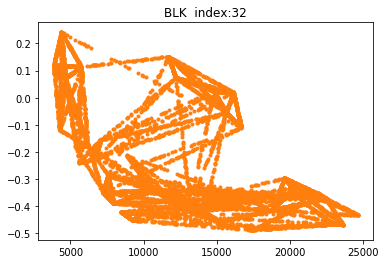

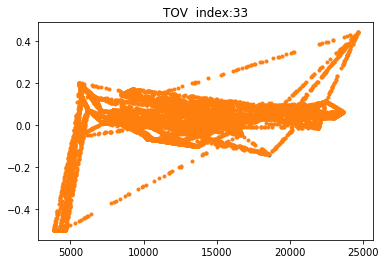

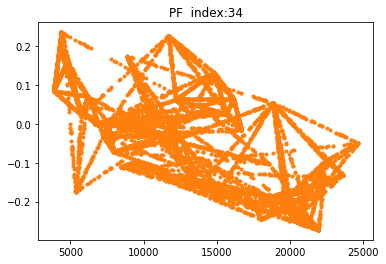

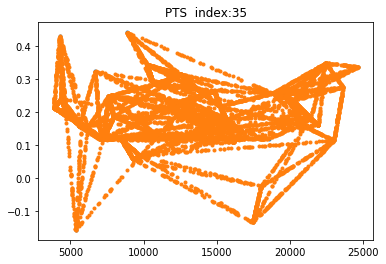

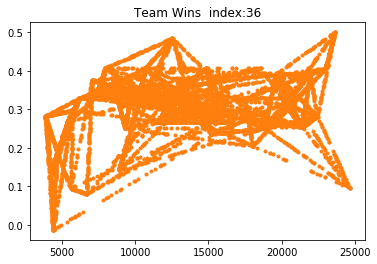

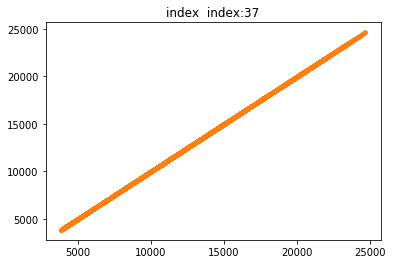

In [14]:
# Plot each column to check for outliers
feature_plots(ndata_MVP,sdata_MVP,Labels)

In [15]:
import sklearn
from sklearn.linear_model import LogisticRegression

C:\Users\lrabin\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [16]:
# Training Logistic Regression
fit_percentage = 0.3
training_index = np.random.choice(len(ndata),size=int(fit_percentage*len(ndata)),replace=0)

clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='ovr').fit(ndata[training_index,:-1], labels[training_index])

pred = clf.predict(ndata[:,:-1])

prob = clf.predict_proba(ndata[:,:-1])

score = clf.score(ndata[:,:-1],labels)

print('Score:',score)

Score: 0.996610456741


In [17]:
# Finding what was right and what was wrong
pos = np.where(pred==1)[0]
MVP = np.where(labels==1)[0]

correct = np.intersect1d(pos,MVP)
fpos = np.setdiff1d(pos,correct)
fneg = np.setdiff1d(MVP,correct)

print('Correct MVPs: ',len(correct),'/',len(MVP))
print('False Positives: ',len(fpos))

Correct MVPs:  5 / 44
False Positives:  1


In [18]:
#print('Correct:')
for i in range(len(correct)):
    mID = int(ndata[correct[i]][-1])
    year = raw_data[mID][0]
    name = Stats[mID][2]

    #print(year,name)

In [19]:
#print('False Positive:')
for i in range(len(fpos)):
    mID = int(ndata[fpos[i]][-1])
    year = raw_data[mID][0]
    name = Stats[mID][2]

    #print(year,name)

In [20]:
#print('False Negative:')
for i in range(len(fneg)):
    mID = int(ndata[fneg[i]][-1])
    year = raw_data[mID][0]
    name = Stats[mID][2]

    #print(year,name)

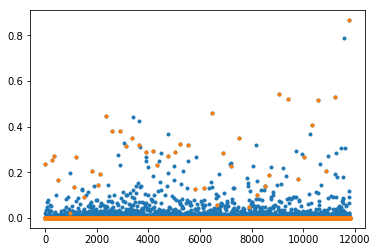

In [21]:
# Plotting MVPs by there probability and non MVPs by prob
ind = []
for i in nind:
    ind.append(i-start)

plt.plot(prob[:,1],'.')
plt.plot(prob[:,1]*labels,'.')
plt.show()

In [72]:
# Also find first index of each year to determine if actual MVP has higher likelihood than false positives
# This block of code splits the data up into years
# year_groups is a list of index that fits into each year
# data_year is a list of data that fits into each year

yearIndex = [0,]
for i in range(len(raw_data)-1):
    if raw_data[i][0] == '':
        yearIndex.append(i)
yearIndex.append(len(raw_data)+1)

data_year = []
year_groups = []
for i in range(len(yearIndex)-1):
    dy = []
    yg = []
    for j in range(len(ndata)):
        player = ndata[j]
        if player[-1] < yearIndex[i+1] and player[-1] > yearIndex[i]:
            dy.append(player)
            yg.append(j)
    data_year.append(dy)
    year_groups.append(yg)

In [23]:
# Print player most likely to win MVP each season
for i in range(len(year_groups)):
    grp = year_groups[i]
    if len(grp) > 1:
        argm = np.argmax(prob[grp,[1]])
        n = grp[argm]

        mID = int(ndata[n][-1])
        year = raw_data[mID][0]
        name = Stats[mID][2]

        #print(year,name)

In [24]:
# Find the "true score" of our logistic regression by finding the player with
# the highest likelihood to be MVP each year
def true_score(prob):
    correct = []
    counter = 0
    for i in range(len(year_groups)):
        grp = year_groups[i]
        if len(grp) > 1:
            counter += 1
            argm = np.argmax(prob[grp,1])
            mvp_choice = grp[argm]
            if int(ndata[mvp_choice][-1]) in MVP_index:
                correct.append(i)
    return len(correct)/counter
print('True Score:',np.round(true_score(prob),5))

True Score: 0.59091


In [25]:
# Add synthetic data to dataset
slabels = np.ones(len(sdata_MVP))

cdata = np.append(ndata,sdata_MVP,axis=0)
clabels = np.append(labels,slabels)

In [26]:
# Now using logistic regression on data with synthetic MVPs included
# c = combined data, r = real data
fit_percentage = 0.3
training_index = np.random.choice(len(cdata),size=int(fit_percentage*len(cdata)),replace=0)

cclf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='ovr').fit(cdata[training_index,:-1], clabels[training_index])

cpred = cclf.predict(cdata[:,:-1])
rpred = cclf.predict(ndata[:,:-1])

cprob = cclf.predict_proba(cdata[:,:-1])
rprob = cclf.predict_proba(ndata[:,:-1])

cscore = cclf.score(cdata[:,:-1],clabels)
rscore = cclf.score(ndata[:,:-1],labels)

print('Combined Score:',cscore)
print('Original Score:',rscore)

Combined Score: 0.990831140165
Original Score: 0.981696466401


In [27]:
# Finding what was right and what was wrong
cpos = np.where(cpred==1)[0]
cMVP = np.where(clabels==1)[0]

rpos = np.where(rpred==1)[0]
rMVP = np.where(labels==1)[0]

ccorrect = np.intersect1d(cpos,cMVP)
cfpos = np.setdiff1d(cpos,ccorrect)
cfneg = np.setdiff1d(cMVP,ccorrect)

rcorrect = np.intersect1d(rpos,rMVP)
rfpos = np.setdiff1d(rpos,rcorrect)
rfneg = np.setdiff1d(rMVP,rcorrect)

print('Correct MVPs (combined): ',len(ccorrect),'/',len(cMVP))
print('Correct MVPs (original): ',len(rcorrect),'/',len(rMVP))
print('False Positives: ',len(rfpos))

Correct MVPs (combined):  11801 / 11801
Correct MVPs (original):  44 / 44
False Positives:  216


In [28]:
#print('False Negative:')
for i in range(len(rfneg)):
    mID = int(ndata[rfneg[i]][-1])
    year = raw_data[mID][0]
    name = Stats[mID][2]

    #print(year,name)

In [29]:
#print('False Positive:')
for i in range(len(rfpos)):
    mID = int(ndata[rfpos[i]][-1])
    year = raw_data[mID][0]
    name = Stats[mID][2]

    #print(year,name)

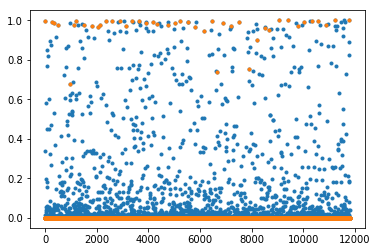

In [30]:
# Plotting MVPs by there probability and non MVPs by prob
ind = []
for i in nind:
    ind.append(i-start)

plt.plot(rprob[:,1],'.')
plt.plot(rprob[:,1]*labels,'.')
plt.show()

In [31]:
# Print player most likely to win MVP each season
for i in range(len(year_groups)):
    grp = year_groups[i]
    if len(grp) > 1:
        argm = np.argmax(rprob[grp,[1]])
        n = grp[argm]

        mID = int(ndata[n][-1])
        year = raw_data[mID][0]
        name = Stats[mID][2]

        #print(year,name)

In [32]:
# Find the "true score" of our logistic regression by finding the player with
# the highest likelihood to be MVP each year
ccorrect = []
counter = 0
for i in range(len(year_groups)):
    grp = year_groups[i]
    if len(grp) > 1:
        counter += 1
        argm = np.argmax(rprob[grp,1])
        mvp_choice = grp[argm]
        if int(ndata[mvp_choice][-1]) in MVP_index:
            ccorrect.append(i)
ctrue_score = len(ccorrect)/counter
print('True Score:',np.round(ctrue_score,5))

True Score: 0.63636


In [33]:
print(ndata[:,:-1].shape)

(11801, 37)


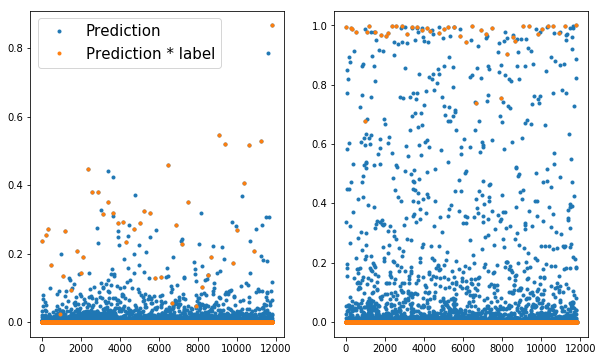

In [34]:
ind = []
for i in nind:
    ind.append(i-start)

plt.figure(figsize=(10,6))    

plt.subplot(1,2,1)
plt.plot(prob[:,1],'.',label='Prediction')
plt.plot(prob[:,1]*labels,'.',label='Prediction * label')
plt.legend(fontsize=15)

plt.subplot(1,2,2)
plt.plot(rprob[:,1],'.')
plt.plot(rprob[:,1]*labels,'.')

plt.show()

In [35]:
def synth_log(N, n):
    avg_ccorrect = 0
    avg_rcorrect = 0
    avg_rfpos = 0
    avg_cscore = 0
    avg_rscore = 0
    avg_true_score = 0
    for i in range(n):
        sdata_MVP = MVP_gen(N)
        slabels = np.ones(len(sdata_MVP))
        cdata = np.append(ndata,sdata_MVP,axis=0)
        clabels = np.append(labels,slabels)
    
        fit_percentage = 0.3
        training_index = np.random.choice(len(cdata),size=int(fit_percentage*len(cdata)),replace=0)

        cclf = LogisticRegression(solver='lbfgs',
                         multi_class='ovr').fit(cdata[training_index,:-1], clabels[training_index])

        cpred = cclf.predict(cdata[:,:-1])
        rpred = cclf.predict(ndata[:,:-1])

        cprob = cclf.predict_proba(cdata[:,:-1])
        rprob = cclf.predict_proba(ndata[:,:-1])

        cscore = cclf.score(cdata[:,:-1],clabels)
        rscore = cclf.score(ndata[:,:-1],labels)

        cpos = np.where(cpred==1)[0]
        cMVP = np.where(clabels==1)[0]

        rpos = np.where(rpred==1)[0]
        rMVP = np.where(labels==1)[0]

        ccorrect = np.intersect1d(cpos,cMVP)
        cfpos = np.setdiff1d(cpos,ccorrect)
        cfneg = np.setdiff1d(cMVP,ccorrect)

        rcorrect = np.intersect1d(rpos,rMVP)
        rfpos = np.setdiff1d(rpos,rcorrect)
        rfneg = np.setdiff1d(rMVP,rcorrect)
        
        avg_ccorrect += len(ccorrect)
        avg_rcorrect += len(rcorrect)
        avg_rfpos += len(rfpos)
        avg_cscore += cscore
        avg_rscore += rscore
        avg_true_score += true_score(rprob)
        
    avg_ccorrect /= float(n)
    avg_rcorrect /= float(n)
    avg_rfpos /= float(n)
    avg_cscore /= float(n)
    avg_rscore /= float(n)
    avg_true_score /= float(n)

    print('Correct MVPs (combined): ',avg_ccorrect,'/',len(cMVP))
    print('Correct MVPs (original): ',avg_rcorrect,'/',len(rMVP))
    print('False Positives: ',avg_rfpos)
    
    print('Combined Score:',avg_cscore)
    print('Original Score:',avg_rscore)
    print('True Score:',np.round(avg_true_score,5))
    
    return [avg_ccorrect/len(cMVP),avg_rcorrect/len(rMVP),avg_rfpos,avg_cscore,avg_rscore,avg_true_score]

In [36]:
s = []

N = [2**i for i in range(6,14)]
N.append(len(ndata)-len(ndata_MVP))
N.append(0)
N.sort()

for i in range(len(N)):
    print('N:',N[i])
    s.append(synth_log(N[i],10**3))
    print()
    
s = np.array(s)

N: 0
Correct MVPs (combined):  0.932 / 44
Correct MVPs (original):  0.932 / 44
False Positives:  0.386
Combined Score: 0.996317769681
Original Score: 0.996317769681
True Score: 0.58148

N: 64
Correct MVPs (combined):  32.495 / 108
Correct MVPs (original):  13.699 / 44
False Positives:  5.989
Combined Score: 0.993131563422
Original Score: 0.996924836878
True Score: 0.63205

N: 128
Correct MVPs (combined):  104.269 / 172
Correct MVPs (original):  25.123 / 44
False Positives:  16.42
Combined Score: 0.992945678598
Original Score: 0.99700898229
True Score: 0.64789

N: 256
Correct MVPs (combined):  244.299 / 300
Correct MVPs (original):  32.716 / 44
False Positives:  33.45
Combined Score: 0.992605872107
Original Score: 0.996209304296
True Score: 0.65743

N: 512
Correct MVPs (combined):  508.537 / 556
Correct MVPs (original):  38.853 / 44
False Positives:  52.916
Combined Score: 0.99184772192
Original Score: 0.995079823744
True Score: 0.65839

N: 1024
Correct MVPs (combined):  1017.053 / 1068

C:\Users\lrabin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log2
  import sys


<Figure size 864x288 with 0 Axes>

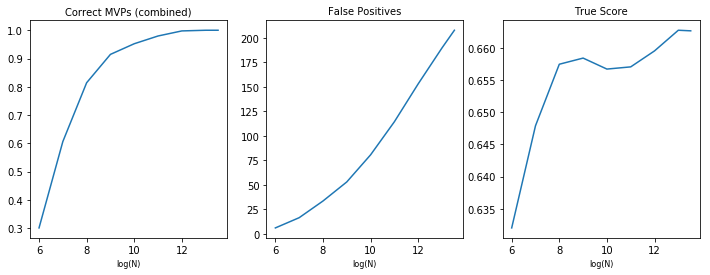

In [65]:
title = ['Correct MVPs (combined)','Correct MVPs (original)','False Positives','Combined Score','Original Score','True Score']
j=1
plt.figure(figsize=(12,4))
for i in [0,2,5]:
    vals = s[:,i]
    plt.subplot(1,3,j)
    plt.plot(np.log2(np.array(N)),vals)
    plt.xlabel('log(N)',fontsize=8)
    plt.title(title[i],fontsize=10)
    j+=1
plt.show()

In [38]:
s

array([[  2.11818182e-02,   2.11818182e-02,   3.86000000e-01,
          9.96317770e-01,   9.96317770e-01,   5.81477273e-01],
       [  3.00879630e-01,   3.11340909e-01,   5.98900000e+00,
          9.93131563e-01,   9.96924837e-01,   6.32045455e-01],
       [  6.06215116e-01,   5.70977273e-01,   1.64200000e+01,
          9.92945679e-01,   9.97008982e-01,   6.47886364e-01],
       [  8.14330000e-01,   7.43545455e-01,   3.34500000e+01,
          9.92605872e-01,   9.96209304e-01,   6.57431818e-01],
       [  9.14634892e-01,   8.83022727e-01,   5.29160000e+01,
          9.91847722e-01,   9.95079824e-01,   6.58386364e-01],
       [  9.52296816e-01,   9.14227273e-01,   8.05830000e+01,
          9.89744250e-01,   9.92851707e-01,   6.56681818e-01],
       [  9.79683556e-01,   9.35090909e-01,   1.14376000e+02,
          9.88672251e-01,   9.90065927e-01,   6.57022727e-01],
       [  9.97613768e-01,   9.73704545e-01,   1.53036000e+02,
          9.89751840e-01,   9.86933904e-01,   6.59500000e-01],


In [49]:
len(ndata)

11801

In [116]:
def split_by_year(n):
    year_groups_ = year_groups[24:]
    data_year_ = data_year[24:]
    year_ct = len(year_groups_)
    year_list = np.random.choice(year_ct,size=int(n),replace=0)
    
    testing_index = []
    for i in range(n):
        grp = year_groups_[year_list[i]]
        for j in range(len(grp)):
            testing_index.append(grp[j])
            
    other_index = [i for i in range(len(ndata)) not in testing_index]        
    
    testing_data = np.array(ndata[testing_index])        
    other_data = np.array(ndata[other_index])
    return testing_data, other_data

SyntaxError: invalid syntax (<ipython-input-116-ad1702131bb5>, line 13)

In [115]:
a, b = split_by_year(1)
print(a.shape)
print(b.shape)

TypeError: 'bool' object is not iterable